<a href="https://colab.research.google.com/github/TRUONGLETHANHVY/HOMEWORK_AI/blob/main/_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
pip install scikit-fuzzy

PRICE= {'VERY HIGH'}
POINT= {'HIGH'}


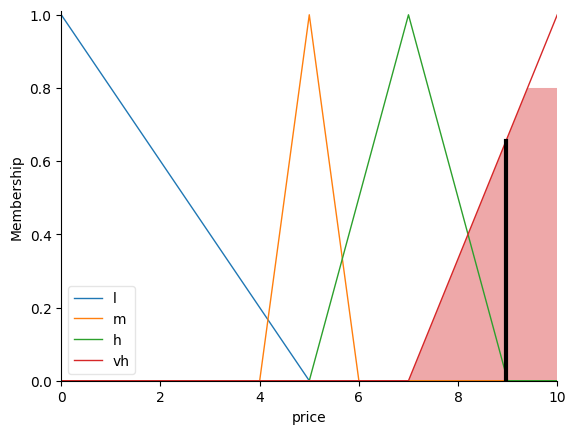

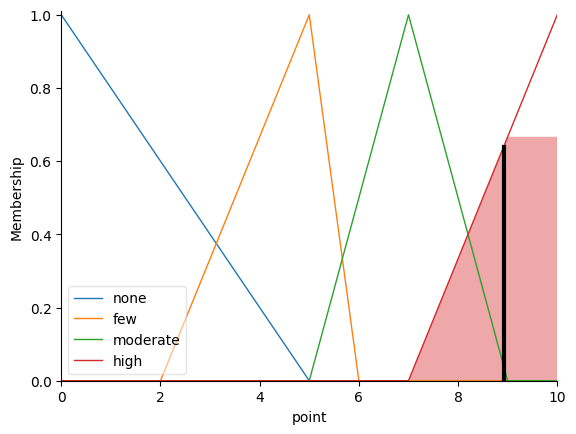

In [ ]:
#Baitap1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

distance=ctrl.Antecedent(np.arange(0,51,1),'distance')
traffic=ctrl.Antecedent(np.arange(0,101,1),'traffic')
weather=ctrl.Antecedent(np.arange(0,16,1),'weather')
demand=ctrl.Antecedent(np.arange(0,101,1),'demand')
rating=ctrl.Antecedent(np.arange(0,6,0.5),'rating')
punctual=ctrl.Antecedent(np.arange(0,11,1),'punctual')
price=ctrl.Consequent(np.arange(0,11,1),'price')
point=ctrl.Consequent(np.arange(0,11,1),'point')

distance['s']=fuzz.trimf(distance.universe,[0,0,2])
distance['m']=fuzz.trimf(distance.universe,[2,6,8])
distance['l']=fuzz.trimf(distance.universe,[6,15,20])
distance['vl']=fuzz.trimf(distance.universe,[15,50,50])

traffic['l']=fuzz.trimf(traffic.universe,[0,0,30])
traffic['m']=fuzz.trimf(traffic.universe,[20,60,70])
traffic['h']=fuzz.trimf(traffic.universe,[60,100,100])

demand['l']=fuzz.trimf(demand.universe,[0,0,30])
demand['m']=fuzz.trimf(demand.universe,[20,60,70])
demand['h']=fuzz.trimf(demand.universe,[60,100,100])

weather['g']=fuzz.trimf(weather.universe,[0,0,5])
weather['m']=fuzz.trimf(weather.universe,[0,5,10])
weather['b']=fuzz.trimf(weather.universe,[5,10,15])

rating['p']=fuzz.trimf(rating.universe,[1,1,2.5])
rating['a']=fuzz.trimf(rating.universe,[2,3.5,4])
rating['g']=fuzz.trimf(rating.universe,[3.5,5,5])

punctual['late']=fuzz.trimf(punctual.universe,[0,0,5])
punctual['ontime']=fuzz.trimf(punctual.universe,[4,7,8])
punctual['early']=fuzz.trimf(punctual.universe,[7,10,10])

price['l']=fuzz.trimf(price.universe,[0,0,5])
price['m']=fuzz.trimf(price.universe,[4,5,6])
price['h']=fuzz.trimf(price.universe,[5,7,9])
price['vh']=fuzz.trimf(price.universe,[7,10,10])

point['none']=fuzz.trimf(point.universe,[0,0,5])
point['few']=fuzz.trimf(point.universe,[2,5,6])
point['moderate']=fuzz.trimf(point.universe,[5,7,9])
point['high']=fuzz.trimf(point.universe,[7,10,10])

rule1=ctrl.Rule(distance['s']&traffic['l']&demand['l'],price['l'])
rule2=ctrl.Rule(distance['s']&traffic['m']&demand['h'],price['m'])
rule3=ctrl.Rule(distance['m']&traffic['h']&demand['h'],price['h'])
rule4=ctrl.Rule(distance['l']&traffic['h']&demand['h'],price['h'])
rule5=ctrl.Rule(distance['l']&traffic['h']&weather['b'],price['vh'])
rule6=ctrl.Rule(distance['vl']&traffic['h']&demand['h'],price['vh'])
rule7=ctrl.Rule(distance['m']&traffic['l']&demand['l'],price['m'])
rule8=ctrl.Rule(distance['l']&traffic['h']&weather['b'],price['h'])
rule9=ctrl.Rule(distance['vl']&weather['b'],price['vh'])
rule10=ctrl.Rule(distance['m']&traffic['m']&weather['m'],price['m'])
rule11=ctrl.Rule(rating['g']&punctual['early'],point['high'])
rule12=ctrl.Rule(rating['a']&punctual['ontime'],point['moderate'])
rule13=ctrl.Rule(rating['p']&punctual['late'],point['none'])
rule14=ctrl.Rule(distance['l']&traffic['h']&punctual['ontime'],point['high'])
rule15=ctrl.Rule(distance['m']&traffic['m']&rating['g'], point['moderate'])
rule16=ctrl.Rule(rating['p']&punctual['late'],point['none'])
rule17=ctrl.Rule(distance['l']&weather['b']&rating['g'],point['high'])
rule18=ctrl.Rule(distance['s']&rating['a']&punctual['ontime'],point['few'])
rule19=ctrl.Rule(distance['l']&traffic['h']&punctual['late'],point['few'])
rule20=ctrl.Rule(distance['m']&weather['m']&rating['g'],point['moderate'])

control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['distance'] = 50
fuzzy_system.input['traffic'] = 100
fuzzy_system.input['weather'] = 9
fuzzy_system.input['demand'] = 9
fuzzy_system.input['rating'] = 5
fuzzy_system.input['punctual'] = 9
fuzzy_system.compute()

price_value= fuzzy_system.output['price']
point_value= fuzzy_system.output['point']

output_value= fuzzy_system.output['price']
if output_value <= 4:
    PRICE = "LOW"
elif output_value <= 7:
    PRICE = "MEDIUM"
elif output_value <= 7.5:
    PRICE = "HIGH"
else:
    PRICE = "VERY HIGH"

output_value= fuzzy_system.output['point']
if output_value <= 4:
    POINT = "NONE"
elif output_value <= 7:
    POINT = "FEW"
elif output_value <= 7.5:
    POINT = "MODERATE"
else:
    POINT = "HIGH"

print("PRICE=",{PRICE})
print("POINT=",{POINT})

price.view(sim=fuzzy_system)
point.view(sim=fuzzy_system)


Tỷ lệ % chiết khấu: 59.5


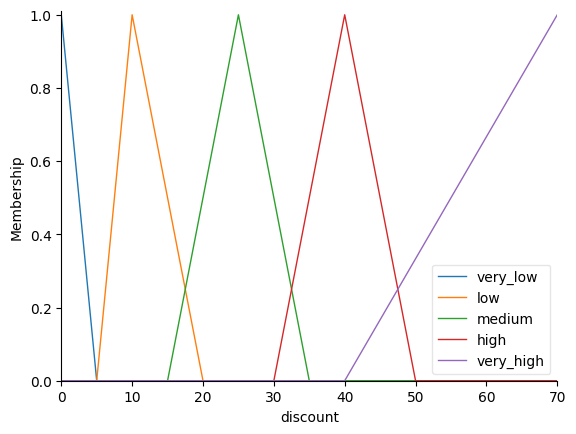

In [ ]:
#Baitap2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

store_rating = ctrl.Antecedent(np.arange(0, 6, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 101, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 11, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_discounts')

discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 0, 4])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [3.5, 4, 4.5])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4.5, 5, 5])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 30])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [20, 50, 70])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [60, 100, 100])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 3])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [2, 5, 7])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [6, 10, 10])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 3])
seasonal_event['moderate'] = fuzz.trimf(seasonal_event.universe, [2, 5, 7])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [6, 10, 10])

competitor_discounts['low'] = fuzz.trimf(competitor_discounts.universe, [0, 0, 3])
competitor_discounts['medium'] = fuzz.trimf(competitor_discounts.universe, [2, 5, 7])
competitor_discounts['high'] = fuzz.trimf(competitor_discounts.universe, [6, 10, 10])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 5])
discount['low'] = fuzz.trimf(discount.universe, [5, 10, 20])
discount['medium'] = fuzz.trimf(discount.universe, [15, 25, 35])
discount['high'] = fuzz.trimf(discount.universe, [30, 40, 50])
discount['very_high'] = fuzz.trimf(discount.universe, [40, 70, 70])


rule1 = ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount['very_low'])
rule2 = ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount['high'])
rule3 = ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount['very_high'])
rule4 = ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount['medium'])
rule5 = ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount['very_low'])
rule6 = ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount['medium'])
rule7 = ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount['very_high'])





control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['store_rating'] = 4.3
fuzzy_system.input['sales_volume'] = 50
fuzzy_system.input['profit_margin'] = 2
fuzzy_system.input['seasonal_event'] = 9
fuzzy_system.input['competitor_discounts'] = 9


fuzzy_system.compute()


print("Tỷ lệ % chiết khấu:",fuzzy_system.output['discount'])


discount.view(sim=fuzzy_system)


NGUY CO TIEU DUONG LA {'HR'}


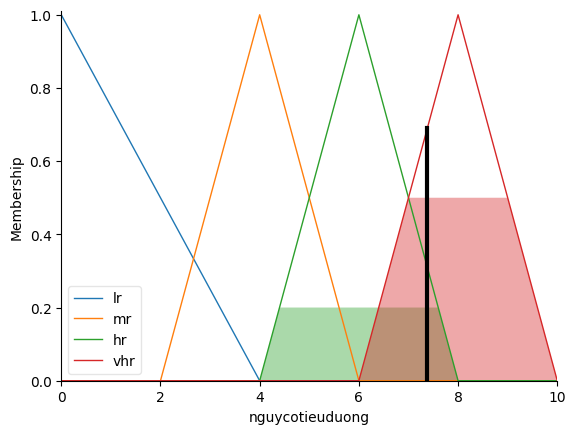

In [ ]:
#vd2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

bsl = ctrl.Antecedent(np.arange(0, 290, 10), 'bsl')
bmi= ctrl.Antecedent(np.arange(0, 40, 1), 'bmi')
fu=ctrl.Antecedent(np.arange(0, 11, 1), 'fu')
fl=ctrl.Antecedent(np.arange(0, 11, 1), 'fl')

nguycotieuduong=ctrl.Consequent(np.arange(0,11,1),'nguycotieuduong')

bsl['l']=fuzz.trimf(bsl.universe,[0,0,80])
bsl['n']=fuzz.trimf(bsl.universe, [70, 100, 130])
bsl['h']=fuzz.trimf(bsl.universe, [100, 160, 240])
bsl['vh']=fuzz.trimf(bsl.universe, [160, 240, 280])

bmi['u']=fuzz.trimf(bmi.universe,[0,0,18.5])
bmi['n']=fuzz.trimf(bmi.universe,[18,22,25])
bmi['o']=fuzz.trimf(bmi.universe,[22,27,30])
bmi['ob']=fuzz.trimf(bmi.universe,[28,30,40])

fu['r']=fuzz.trimf(fu.universe,[0,0,5])
fu['s']=fuzz.trimf(fu.universe,[0,5,10])
fu['o']=fuzz.trimf(fu.universe,[5,10,10])

fl['l']=fuzz.trimf(fu.universe,[0,0,5])
fl['m']=fuzz.trimf(fu.universe,[0,5,10])
fl['h']=fuzz.trimf(fu.universe,[5,10,10])

nguycotieuduong['lr']=fuzz.trimf(nguycotieuduong.universe,[0,0,4])
nguycotieuduong['mr']=fuzz.trimf(nguycotieuduong.universe,[2,4,6])
nguycotieuduong['hr']=fuzz.trimf(nguycotieuduong.universe,[4,6,8])
nguycotieuduong['vhr']=fuzz.trimf(nguycotieuduong.universe,[6,8,10])

# Instantiate the rules using ctrl.Rule
rule1=ctrl.Rule(bsl['vh']&fu['o'],nguycotieuduong['vhr'])
rule2=ctrl.Rule(bsl['vh']&fu['s'],nguycotieuduong['hr'])
rule3=ctrl.Rule(bsl['h']&fu['o'],nguycotieuduong['hr'])
rule4=ctrl.Rule(bsl['n']&fu['r'],nguycotieuduong['lr'])

rule5=ctrl.Rule(bsl['l']&bmi['ob'],nguycotieuduong['vhr'])
rule6=ctrl.Rule(bsl['vh']&bmi['o'],nguycotieuduong['hr'])
rule7=ctrl.Rule(bsl['h']&bmi['o'],nguycotieuduong['hr'])
rule8=ctrl.Rule(bsl['n']&bmi['o'],nguycotieuduong['mr'])
rule9=ctrl.Rule(bsl['n']&bmi['n'],nguycotieuduong['lr'])

rule10=ctrl.Rule(bsl['vh']&fl['h'],nguycotieuduong['vhr'])
rule11=ctrl.Rule(bsl['h']&fl['h'],nguycotieuduong['hr'])
rule12=ctrl.Rule(bsl['h']&fl['m'],nguycotieuduong['mr'])
rule13=ctrl.Rule(bsl['n']&fl['l'],nguycotieuduong['lr'])

control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['bsl'] = 260
fuzzy_system.input['bmi'] = 35
fuzzy_system.input['fu'] = 9
fuzzy_system.input['fl'] = 9
fuzzy_system.compute()

output_value= fuzzy_system.output['nguycotieuduong']
if output_value <= 4:
    risk_level = "LR"
elif output_value <= 7:
    risk_level = "MR"
elif output_value <= 7.5:
    risk_level = "HR"
else:
    risk_level = "VHR"

print("NGUY CO TIEU DUONG LA",{risk_level})
nguycotieuduong.view(sim=fuzzy_system)

Giá cuối cùng= 54.99999999999999


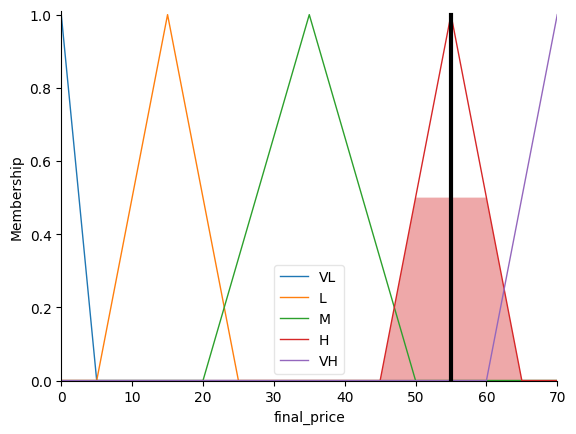

In [ ]:
#vd2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand_level = ctrl.Antecedent(np.arange(0, 11, 1), 'demand_level')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0, 71, 1), 'final_price')


demand_level['L'] = fuzz.trimf(demand_level.universe, [0, 0, 4])
demand_level['M'] = fuzz.trimf(demand_level.universe, [3, 5, 7])
demand_level['H'] = fuzz.trimf(demand_level.universe, [6, 10, 10])

competitor_pricing['L'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 4])
competitor_pricing['M'] = fuzz.trimf(competitor_pricing.universe, [3, 5, 7])
competitor_pricing['H'] = fuzz.trimf(competitor_pricing.universe, [6, 10, 10])

production_cost['L'] = fuzz.trimf(production_cost.universe, [0, 0, 4])
production_cost['M'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['H'] = fuzz.trimf(production_cost.universe, [6, 10, 10])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock_level['L'] = fuzz.trimf(stock_level.universe, [0, 0, 4])
stock_level['M'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['H'] = fuzz.trimf(stock_level.universe, [6, 10, 10])

final_price['VL'] = fuzz.trimf(final_price.universe, [0, 0, 5])
final_price['L'] = fuzz.trimf(final_price.universe, [5, 15, 25])
final_price['M'] = fuzz.trimf(final_price.universe, [20, 35, 50])
final_price['H'] = fuzz.trimf(final_price.universe, [45, 55, 65])
final_price['VH'] = fuzz.trimf(final_price.universe, [60, 70, 70])

rule1 = ctrl.Rule(demand_level['H'] & competitor_pricing['H'] & stock_level['L'], final_price['VH'])
rule2 = ctrl.Rule(demand_level['H'] & seasonality['peak'] & stock_level['L'], final_price['VH'])
rule3 = ctrl.Rule(demand_level['M'] & production_cost['H'] & stock_level['L'], final_price['VH'])
rule4 = ctrl.Rule(demand_level['H'] & competitor_pricing['M'] & stock_level['M'], final_price['H'])
rule5 = ctrl.Rule(demand_level['M'] & competitor_pricing['H'] & stock_level['L'], final_price['H'])
rule6 = ctrl.Rule(demand_level['H'] & seasonality['peak'] & stock_level['M'], final_price['H'])
rule7 = ctrl.Rule(demand_level['M'] & competitor_pricing['M'] & stock_level['M'], final_price['M'])
rule8 = ctrl.Rule(demand_level['L'] & competitor_pricing['H'] & stock_level['M'], final_price['M'])
rule9 = ctrl.Rule(demand_level['M'] & production_cost['M'] & stock_level['M'], final_price['M'])
rule10 = ctrl.Rule(demand_level['L'] & competitor_pricing['L'] & stock_level['H'], final_price['L'])
rule11 = ctrl.Rule(demand_level['M'] & production_cost['L'] & stock_level['H'], final_price['L'])
rule12 = ctrl.Rule(demand_level['L'] & seasonality['off_peak'] & stock_level['H'], final_price['L'])
rule13 = ctrl.Rule(demand_level['L'] & competitor_pricing['L'] & stock_level['H'], final_price['VL'])
rule14 = ctrl.Rule(demand_level['L'] & seasonality['off_peak'] & stock_level['H'], final_price['VL'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['demand_level'] = 8
fuzzy_system.input['competitor_pricing'] = 6
fuzzy_system.input['production_cost'] = 7
fuzzy_system.input['seasonality'] = 9
fuzzy_system.input['stock_level'] = 4


fuzzy_system.compute()


print("Giá cuối cùng=",fuzzy_system.output['final_price'])


final_price.view(sim=fuzzy_system)


Thời gian giặt=
Mực nước=


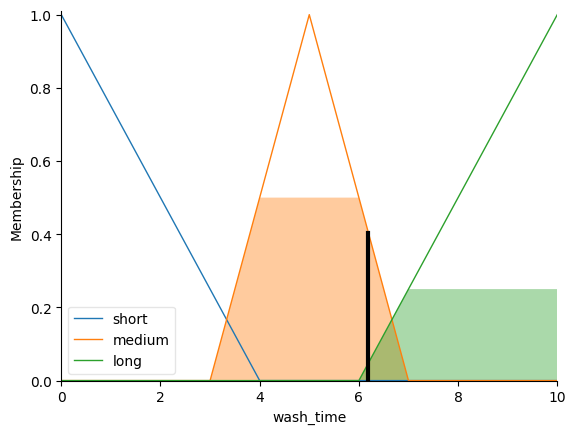

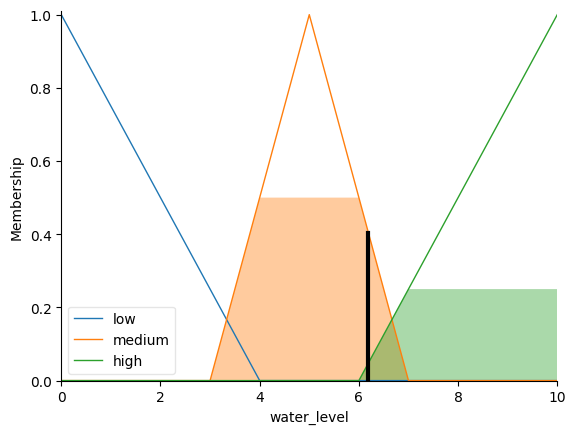

In [ ]:
#vd2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')


wash_time = ctrl.Consequent(np.arange(0, 11, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')


load['S'] = fuzz.trimf(load.universe, [0, 0, 4])
load['M'] = fuzz.trimf(load.universe, [3, 5, 7])
load['L'] = fuzz.trimf(load.universe, [6, 10, 10])

dirt_level['L'] = fuzz.trimf(dirt_level.universe, [0, 0, 4])
dirt_level['M'] = fuzz.trimf(dirt_level.universe, [3, 5, 7])
dirt_level['H'] = fuzz.trimf(dirt_level.universe, [6, 10, 10])

fabric_type['D'] = fuzz.trimf(fabric_type.universe, [0, 0, 4])
fabric_type['N'] = fuzz.trimf(fabric_type.universe, [3, 5, 7])
fabric_type['H'] = fuzz.trimf(fabric_type.universe, [6, 10, 10])


wash_time['S'] = fuzz.trimf(wash_time.universe, [0, 0, 4])
wash_time['M'] = fuzz.trimf(wash_time.universe, [3, 5, 7])
wash_time['L'] = fuzz.trimf(wash_time.universe, [6, 10, 10])

water_level['L'] = fuzz.trimf(water_level.universe, [0, 0, 4])
water_level['M'] = fuzz.trimf(water_level.universe, [3, 5, 7])
water_level['H'] = fuzz.trimf(water_level.universe, [6, 10, 10])


rule1 = ctrl.Rule(load['S'] & dirt_level['L'], (wash_time['S'], water_level['L']))
rule2 = ctrl.Rule(load['S'] & dirt_level['M'], (wash_time['M'], water_level['M']))
rule3 = ctrl.Rule(load['S'] & dirt_level['H'], (wash_time['L'], water_level['M']))
rule4 = ctrl.Rule(load['M'] & dirt_level['L'], (wash_time['M'], water_level['M']))
rule5 = ctrl.Rule(load['M'] & dirt_level['M'], (wash_time['L'], water_level['M']))
rule6 = ctrl.Rule(load['M'] & dirt_level['H'], (wash_time['L'], water_level['H']))
rule7 = ctrl.Rule(load['L'] & dirt_level['L'], (wash_time['M'], water_level['H']))
rule8 = ctrl.Rule(load['L'] & dirt_level['M'], (wash_time['L'], water_level['H']))
rule9 = ctrl.Rule(load['L'] & dirt_level['H'], (wash_time['L'], water_level['H']))
rule10 = ctrl.Rule(fabric_type['D'], (wash_time['S'], water_level['L']))
rule11 = ctrl.Rule(fabric_type['N'], (wash_time['M'], water_level['M']))
rule12 = ctrl.Rule(fabric_type['H'], (wash_time['L'], water_level['H']))


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['load'] = 7
fuzzy_system.input['dirt_level'] = 8
fuzzy_system.input['fabric_type'] = 6


fuzzy_system.compute()


print("Thời gian giặt=",fuzzy_system.output['wash_time'])
print("Mực nước=",fuzzy_system.output['water_level'])

wash_time.view(sim=fuzzy_system)
water_level.view(sim=fuzzy_system)


Tốc độ quạt= 6.444444444444445
Mức độ làm mát= 8.666666666666668


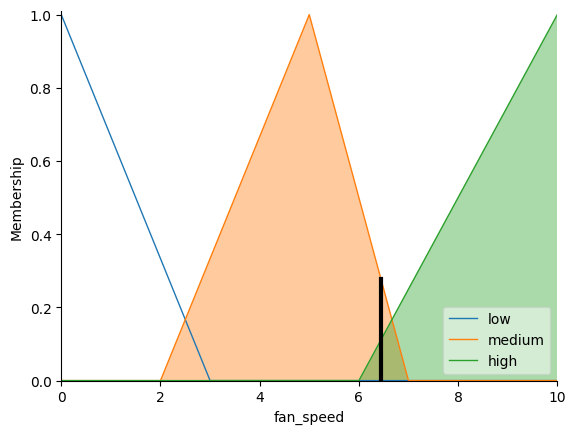

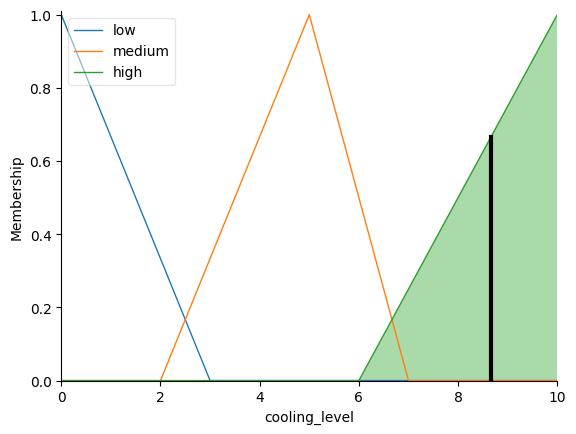

In [ ]:
#vd2.5

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people_count = ctrl.Antecedent(np.arange(0, 11, 1), 'people_count')


fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 11, 1), 'cooling_level')


temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 18])
temperature['cool'] = fuzz.trimf(temperature.universe, [16, 20, 24])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['warm'] = fuzz.trimf(temperature.universe, [28, 32, 36])
temperature['hot'] = fuzz.trimf(temperature.universe, [34, 40, 40])

humidity['L'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['M'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['H'] = fuzz.trimf(humidity.universe, [60, 100, 100])

people_count['few'] = fuzz.trimf(people_count.universe, [0, 0, 3])
people_count['moderate'] = fuzz.trimf(people_count.universe, [2, 5, 7])
people_count['many'] = fuzz.trimf(people_count.universe, [6, 10, 10])


fan_speed['L'] = fuzz.trimf(fan_speed.universe, [0, 0, 3])
fan_speed['M'] = fuzz.trimf(fan_speed.universe, [2, 5, 7])
fan_speed['H'] = fuzz.trimf(fan_speed.universe, [6, 10, 10])

cooling_level['L'] = fuzz.trimf(cooling_level.universe, [0, 0, 3])
cooling_level['M'] = fuzz.trimf(cooling_level.universe, [2, 5, 7])
cooling_level['H'] = fuzz.trimf(cooling_level.universe, [6, 10, 10])

rule1 = ctrl.Rule(temperature['cold'], (fan_speed['L'], cooling_level['L']))
rule2 = ctrl.Rule(temperature['cool'], (fan_speed['L'], cooling_level['L']))
rule3 = ctrl.Rule(temperature['comfortable'], (fan_speed['medium'], cooling_level['M']))
rule4 = ctrl.Rule(temperature['warm'], (fan_speed['H'], cooling_level['H']))
rule5 = ctrl.Rule(temperature['hot'], (fan_speed['H'], cooling_level['H']))

rule6 = ctrl.Rule(humidity['L'], cooling_level['L'])
rule7 = ctrl.Rule(humidity['M'], cooling_level['M'])
rule8 = ctrl.Rule(humidity['H'], cooling_level['H'])

rule9 = ctrl.Rule(people_count['few'], fan_speed['low'])
rule10 = ctrl.Rule(people_count['moderate'], fan_speed['medium'])
rule11 = ctrl.Rule(people_count['many'], fan_speed['high'])

rule12 = ctrl.Rule(temperature['hot'] & humidity['H'] & people_count['many'],(fan_speed['H'], cooling_level['H']))
rule13 = ctrl.Rule(temperature['comfortable'] & humidity['M'] & people_count['moderate'],(fan_speed['M'], cooling_level['M']))
rule14 = ctrl.Rule(temperature['cool'] & humidity['L'] & people_count['few'],(fan_speed['L'], cooling_level['L']))


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
                              rule9, rule10, rule11, rule12, rule13, rule14])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['temperature'] = 32
fuzzy_system.input['humidity'] = 80
fuzzy_system.input['people_count'] = 5


fuzzy_system.compute()


print("Tốc độ quạt=",fuzzy_system.output['fan_speed'])
print("Mức độ làm mát=",fuzzy_system.output['cooling_level'])


fan_speed.view(sim=fuzzy_system)
cooling_level.view(sim=fuzzy_system)


Thời gian nấu (phút)= 18.489827856025045
Mức công suất (%)= 88.33333333333333


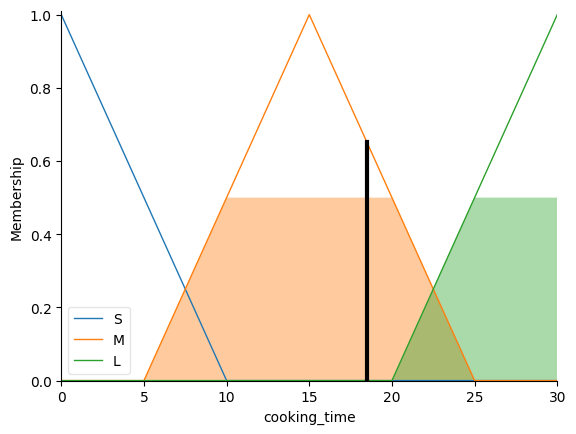

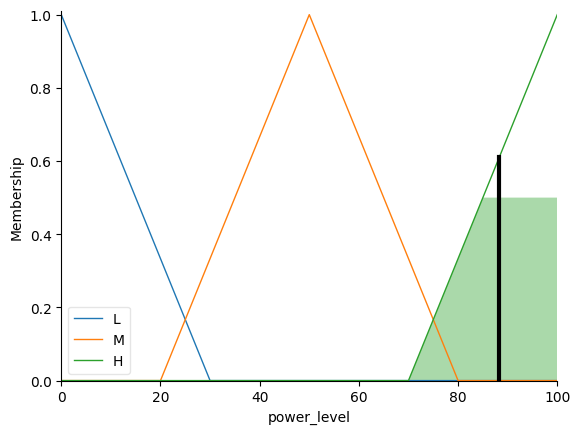

In [ ]:
#vd2.6

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food_weight = ctrl.Antecedent(np.arange(0, 2001, 1), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'food_temperature')


cooking_time = ctrl.Consequent(np.arange(0, 31, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')


food_weight['L'] = fuzz.trimf(food_weight.universe, [0, 0, 800])
food_weight['M'] = fuzz.trimf(food_weight.universe, [600, 1000, 1400])
food_weight['H'] = fuzz.trimf(food_weight.universe, [1200, 2000, 2000])

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['M'] = fuzz.trimf(food_type.universe, [3, 5, 7])
food_type['H'] = fuzz.trimf(food_type.universe, [6, 10, 10])

food_temperature['C'] = fuzz.trimf(food_temperature.universe, [0, 0, 10])
food_temperature['W'] = fuzz.trimf(food_temperature.universe, [20, 25, 30])
food_temperature['H'] = fuzz.trimf(food_temperature.universe, [40, 50, 60])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0, 0, 10])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [5, 15, 25])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [20, 30, 30])

power_level['L'] = fuzz.trimf(power_level.universe, [0, 0, 30])
power_level['M'] = fuzz.trimf(power_level.universe, [20, 50, 80])
power_level['H'] = fuzz.trimf(power_level.universe, [70, 100, 100])


rule1 = ctrl.Rule(food_weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(food_weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(food_weight['H'], cooking_time['L'])
rule4 = ctrl.Rule(food_type['S'], power_level['L'])
rule5 = ctrl.Rule(food_type['M'], power_level['M'])
rule6 = ctrl.Rule(food_type['H'], power_level['H'])
rule7 = ctrl.Rule(food_temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(food_temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(food_temperature['H'], cooking_time['S'])
rule10 = ctrl.Rule(food_weight['H'] & food_type['H'] & food_temperature['C'],(cooking_time['L'], power_level['H']))
rule11 = ctrl.Rule(food_weight['M'] & food_type['S'] & food_temperature['W'],(cooking_time['M'], power_level['L']))
rule12 = ctrl.Rule(food_weight['L'] & food_type['M'] & food_temperature['H'], (cooking_time['S'], power_level['M']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,rule8, rule9, rule10, rule11, rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['food_weight'] = 1200
fuzzy_system.input['food_type'] = 8
fuzzy_system.input['food_temperature'] = 5

fuzzy_system.compute()

print("Thời gian nấu (phút)=",fuzzy_system.output['cooking_time'])
print("Mức công suất (%)=",fuzzy_system.output['power_level'])

cooking_time.view(sim=fuzzy_system)
power_level.view(sim=fuzzy_system)


Thời gian nấu (phút) 52.22222222222222
Mức nhiệt (%) 89.5


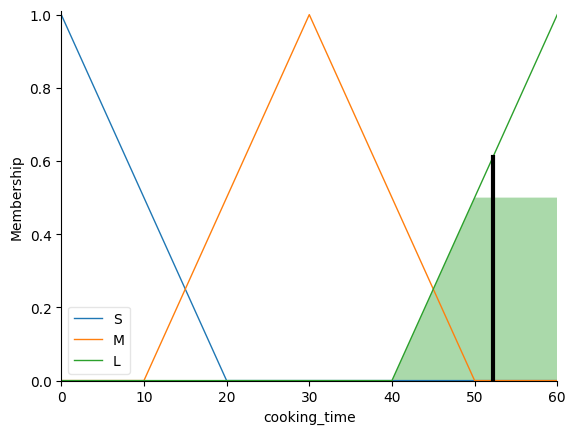

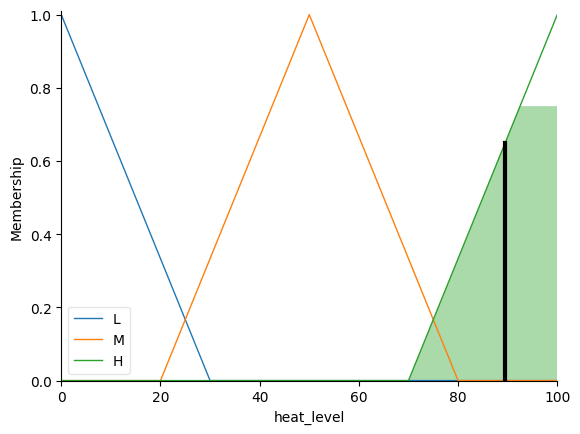

In [ ]:
#vd2.7

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 2001, 1), 'food_weight')
initial_temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'initial_temperature')
water_content = ctrl.Antecedent(np.arange(0, 11, 1), 'water_content')


cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')


food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['M'] = fuzz.trimf(food_type.universe, [3, 5, 7])
food_type['H'] = fuzz.trimf(food_type.universe, [6, 10, 10])

food_weight['L'] = fuzz.trimf(food_weight.universe, [0, 0, 800])
food_weight['M'] = fuzz.trimf(food_weight.universe, [600, 1000, 1400])
food_weight['H'] = fuzz.trimf(food_weight.universe, [1200, 2000, 2000])

initial_temperature['C'] = fuzz.trimf(initial_temperature.universe, [0, 0, 10])
initial_temperature['W'] = fuzz.trimf(initial_temperature.universe, [20, 25, 30])
initial_temperature['H'] = fuzz.trimf(initial_temperature.universe, [40, 50, 60])

water_content['L'] = fuzz.trimf(water_content.universe, [0, 0, 4])
water_content['M'] = fuzz.trimf(water_content.universe, [3, 5, 7])
water_content['H'] = fuzz.trimf(water_content.universe, [6, 10, 10])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0, 0, 20])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [10, 30, 50])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [40, 60, 60])

heat_level['L'] = fuzz.trimf(heat_level.universe, [0, 0, 30])
heat_level['M'] = fuzz.trimf(heat_level.universe, [20, 50, 80])
heat_level['H'] = fuzz.trimf(heat_level.universe, [70, 100, 100])


rule1 = ctrl.Rule(food_weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(food_weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(food_weight['H'], cooking_time['L'])

rule4 = ctrl.Rule(food_type['S'], heat_level['L'])
rule5 = ctrl.Rule(food_type['M'], heat_level['M'])
rule6 = ctrl.Rule(food_type['H'], heat_level['H'])

rule7 = ctrl.Rule(initial_temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(initial_temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(initial_temperature['H'], cooking_time['S'])

rule10 = ctrl.Rule(food_weight['H'] & food_type['H'] & initial_temperature['C'],
                   (cooking_time['L'], heat_level['H']))
rule11 = ctrl.Rule(food_weight['M'] & food_type['S'] & initial_temperature['W'],
                   (cooking_time['M'], heat_level['L']))
rule12 = ctrl.Rule(food_weight['L'] & food_type['M'] & initial_temperature['H'],(cooking_time['S'], heat_level['M']))
rule13 = ctrl.Rule(water_content['L'], heat_level['L'])
rule14 = ctrl.Rule(water_content['M'], heat_level['M'])
rule15 = ctrl.Rule(water_content['H'], heat_level['H'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system= ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['food_weight'] = 1500
fuzzy_system.input['food_type'] = 8
fuzzy_system.input['initial_temperature'] = 5
fuzzy_system.input['water_content'] = 9
fuzzy_system.compute()


print("Thời gian nấu (phút)",fuzzy_system.output['cooking_time'])
print("Mức nhiệt (%)",fuzzy_system.output['heat_level'])


cooking_time.view(sim=fuzzy_system)
heat_level.view(sim=fuzzy_system)


Liều dùng thuốc: 87.82135076252722
Dịch truyền tĩnh mạch: 85.41269841269838
Liệu pháp oxy: 8.541269841269841


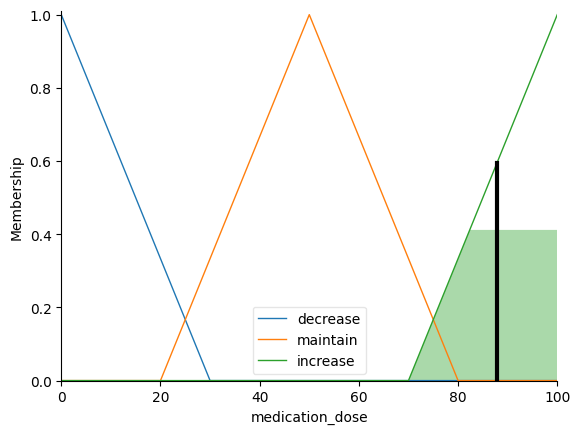

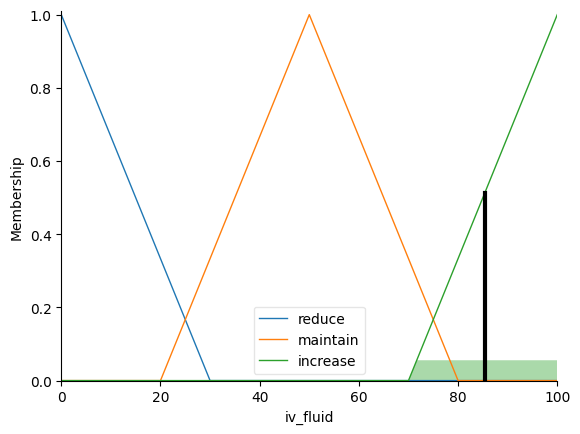

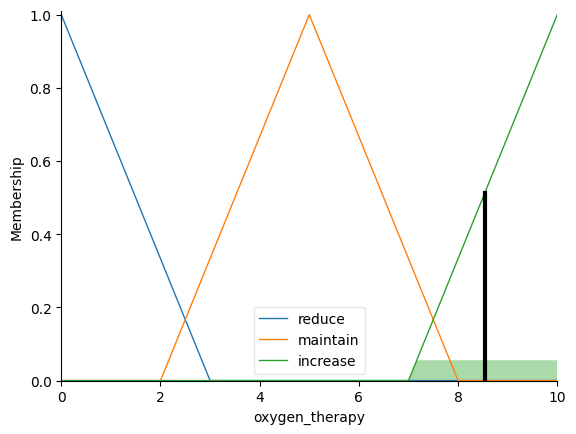

In [ ]:
#vd2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


heart_rate = ctrl.Antecedent(np.arange(0, 201, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(0, 301, 1), 'blood_sugar')

medication_dose = ctrl.Consequent(np.arange(0, 101, 1), 'medication_dose')
iv_fluid = ctrl.Consequent(np.arange(0, 101, 1), 'iv_fluid')
oxygen_therapy = ctrl.Consequent(np.arange(0, 11, 1), 'oxygen_therapy')


heart_rate['L'] = fuzz.trimf(heart_rate.universe, [0, 0, 60])
heart_rate['N'] = fuzz.trimf(heart_rate.universe, [50, 75, 100])
heart_rate['H'] = fuzz.trimf(heart_rate.universe, [90, 200, 200])

blood_pressure['L'] = fuzz.trimf(blood_pressure.universe, [0, 0, 90])
blood_pressure['N'] = fuzz.trimf(blood_pressure.universe, [80, 100, 120])
blood_pressure['H'] = fuzz.trimf(blood_pressure.universe, [110, 200, 200])

body_temperature['L'] = fuzz.trimf(body_temperature.universe, [0, 0, 36])
body_temperature['N'] = fuzz.trimf(body_temperature.universe, [35, 37, 37.5])
body_temperature['H'] = fuzz.trimf(body_temperature.universe, [37, 41, 41])

oxygen_saturation['L'] = fuzz.trimf(oxygen_saturation.universe, [0, 0, 90])
oxygen_saturation['N'] = fuzz.trimf(oxygen_saturation.universe, [85, 100, 100])

blood_sugar['L'] = fuzz.trimf(blood_sugar.universe, [0, 0, 70])
blood_sugar['N'] = fuzz.trimf(blood_sugar.universe, [60, 100, 140])
blood_sugar['H'] = fuzz.trimf(blood_sugar.universe, [130, 300, 300])

medication_dose['decrease'] = fuzz.trimf(medication_dose.universe, [0, 0, 30])
medication_dose['maintain'] = fuzz.trimf(medication_dose.universe, [20, 50, 80])
medication_dose['increase'] = fuzz.trimf(medication_dose.universe, [70, 100, 100])

iv_fluid['reduce'] = fuzz.trimf(iv_fluid.universe, [0, 0, 30])
iv_fluid['maintain'] = fuzz.trimf(iv_fluid.universe, [20, 50, 80])
iv_fluid['increase'] = fuzz.trimf(iv_fluid.universe, [70, 100, 100])

oxygen_therapy['reduce'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 3])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [2, 5, 8])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [7, 10, 10])


rule1 = ctrl.Rule(heart_rate['L'] & blood_pressure['L'], (iv_fluid['increase'], medication_dose['increase']))
rule2 = ctrl.Rule(heart_rate['H'] & blood_pressure['H'], medication_dose['decrease'])
rule3 = ctrl.Rule(heart_rate['N'] & blood_pressure['N'], medication_dose['maintain'])
rule4 = ctrl.Rule(body_temperature['H'] & oxygen_saturation['L'], (oxygen_therapy['increase'], medication_dose['increase']))
rule5 = ctrl.Rule(body_temperature['N'] & oxygen_saturation['N'], (oxygen_therapy['maintain'], medication_dose['maintain']))
rule6 = ctrl.Rule(body_temperature['L'] & oxygen_saturation['L'], (oxygen_therapy['increase'], iv_fluid['increase']))
rule7 = ctrl.Rule(blood_sugar['H'], medication_dose['increase'])
rule8 = ctrl.Rule(blood_sugar['L'], (medication_dose['decrease'], iv_fluid['increase']))
rule9 = ctrl.Rule(blood_sugar['N'], medication_dose['maintain'])
rule10 = ctrl.Rule(blood_pressure['H'] & blood_sugar['H'] & heart_rate['H'], medication_dose['decrease'])
rule11 = ctrl.Rule(blood_pressure['L'] & oxygen_saturation['L'] & heart_rate['L'], (iv_fluid['increase'], oxygen_therapy['increase'], medication_dose['increase']))
rule12 = ctrl.Rule(body_temperature['H'] & blood_pressure['H'] & oxygen_saturation['N'], (medication_dose['increase'], oxygen_therapy['maintain']))


control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['heart_rate'] = 45
fuzzy_system.input['blood_pressure'] = 85
fuzzy_system.input['body_temperature'] = 39
fuzzy_system.input['oxygen_saturation'] = 85
fuzzy_system.input['blood_sugar'] = 200
fuzzy_system.compute()


print("Liều dùng thuốc:",fuzzy_system.output['medication_dose'])
print("Dịch truyền tĩnh mạch:",fuzzy_system.output['iv_fluid'])
print("Liệu pháp oxy:",fuzzy_system.output['oxygen_therapy'])


medication_dose.view(sim=fuzzy_system)
iv_fluid.view(sim=fuzzy_system)
oxygen_therapy.view(sim=fuzzy_system)


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.5 MB/s eta 0:00:00


Phân loại cảm xúc đánh giá: 8.444444444444445


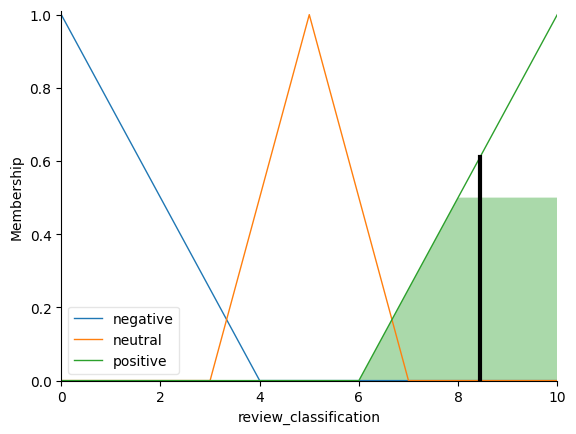

In [ ]:
#vd2.9

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 11, 1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')

review_classification = ctrl.Consequent(np.arange(0, 11, 1), 'review_classification')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 4])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [3, 5, 7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [6, 10, 10])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [1, 3, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [4, 10, 10])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [1, 3, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [4, 10, 10])


review_classification['negative'] = fuzz.trimf(review_classification.universe, [0, 0, 4])
review_classification['neutral'] = fuzz.trimf(review_classification.universe, [3, 5, 7])
review_classification['positive'] = fuzz.trimf(review_classification.universe, [6, 10, 10])


rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_classification['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_classification['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_classification['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_classification['positive'])

rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_classification['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_classification['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_classification['neutral'])

rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_classification['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_classification['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_classification['positive'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['sentiment_score'] = 0.8
fuzzy_system.input['emotion_intensity'] = 9
fuzzy_system.input['positive_words'] = 7
fuzzy_system.input['negative_words'] = 1


fuzzy_system.compute()


print("Phân loại cảm xúc đánh giá:",fuzzy_system.output['review_classification'])


review_classification.view(sim=fuzzy_system)


Thời gian giao hàng 49.44444444444445
Tiền thưởng khuyến khích  8.916666666666668
Xếp hạng hiệu suất tài xế 3.0


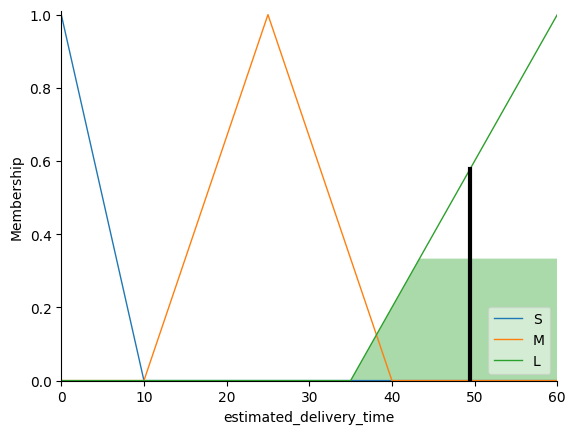

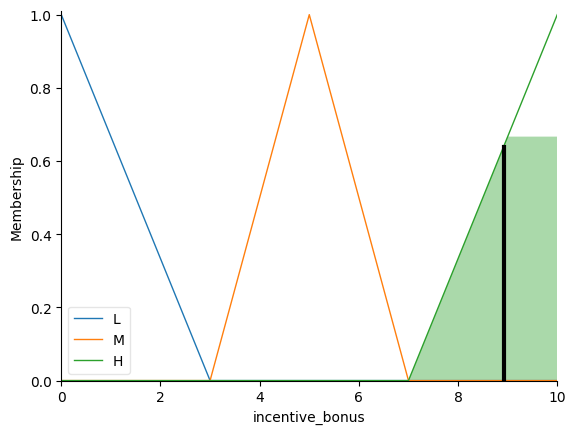

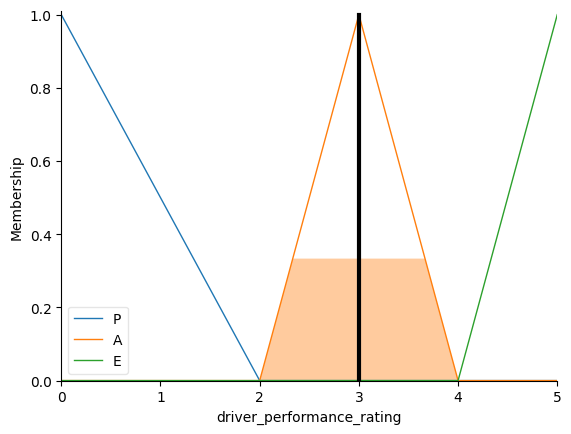

In [ ]:
#vd2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_condition')
distance_to_customer = ctrl.Antecedent(np.arange(0, 21, 1), 'distance_to_customer')
weather_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'weather_condition')
order_preparation_time = ctrl.Antecedent(np.arange(0, 31, 1), 'order_preparation_time')
driver_fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'driver_fatigue')

estimated_delivery_time = ctrl.Consequent(np.arange(0, 61, 1), 'estimated_delivery_time')
incentive_bonus = ctrl.Consequent(np.arange(0, 11, 1), 'incentive_bonus')
driver_performance_rating = ctrl.Consequent(np.arange(0, 6, 1), 'driver_performance_rating')

traffic_condition['L'] = fuzz.trimf(traffic_condition.universe, [0, 0, 3])
traffic_condition['M'] = fuzz.trimf(traffic_condition.universe, [2, 5, 8])
traffic_condition['H'] = fuzz.trimf(traffic_condition.universe, [7, 10, 10])

distance_to_customer['S'] = fuzz.trimf(distance_to_customer.universe, [0, 0, 3])
distance_to_customer['M'] = fuzz.trimf(distance_to_customer.universe, [2, 5, 8])
distance_to_customer['L'] = fuzz.trimf(distance_to_customer.universe, [7, 20, 20])

weather_condition['C'] = fuzz.trimf(weather_condition.universe, [0, 0, 3])
weather_condition['R'] = fuzz.trimf(weather_condition.universe, [2, 5, 8])
weather_condition['S'] = fuzz.trimf(weather_condition.universe, [7, 10, 10])

order_preparation_time['F'] = fuzz.trimf(order_preparation_time.universe, [0, 0, 5])
order_preparation_time['M'] = fuzz.trimf(order_preparation_time.universe, [5, 10, 15])
order_preparation_time['S'] = fuzz.trimf(order_preparation_time.universe, [15, 30, 30])

driver_fatigue['L'] = fuzz.trimf(driver_fatigue.universe, [0, 0, 3])
driver_fatigue['M'] = fuzz.trimf(driver_fatigue.universe, [2, 5, 8])
driver_fatigue['H'] = fuzz.trimf(driver_fatigue.universe, [7, 10, 10])

estimated_delivery_time['S'] = fuzz.trimf(estimated_delivery_time.universe, [0, 0, 10])
estimated_delivery_time['M'] = fuzz.trimf(estimated_delivery_time.universe, [10, 25, 40])
estimated_delivery_time['L'] = fuzz.trimf(estimated_delivery_time.universe, [35, 60, 60])

incentive_bonus['L'] = fuzz.trimf(incentive_bonus.universe, [0, 0, 3])
incentive_bonus['M'] = fuzz.trimf(incentive_bonus.universe, [3, 5, 7])
incentive_bonus['H'] = fuzz.trimf(incentive_bonus.universe, [7, 10, 10])

driver_performance_rating['P'] = fuzz.trimf(driver_performance_rating.universe, [0, 0, 2])
driver_performance_rating['A'] = fuzz.trimf(driver_performance_rating.universe, [2, 3, 4])
driver_performance_rating['E'] = fuzz.trimf(driver_performance_rating.universe, [4, 5, 5])

rule1 = ctrl.Rule(traffic_condition['L'] & distance_to_customer['S'], estimated_delivery_time['S'])
rule2 = ctrl.Rule(traffic_condition['M'] & distance_to_customer['M'], estimated_delivery_time['M'])
rule3 = ctrl.Rule(traffic_condition['H'] & distance_to_customer['L'], estimated_delivery_time['L'])

rule4 = ctrl.Rule(weather_condition['C'], incentive_bonus['L'])
rule5 = ctrl.Rule(weather_condition['R'], incentive_bonus['M'])
rule6 = ctrl.Rule(weather_condition['S'], incentive_bonus['H'])

rule7 = ctrl.Rule(order_preparation_time['F'] & traffic_condition['L'], estimated_delivery_time['S'])
rule8 = ctrl.Rule(order_preparation_time['M'] & traffic_condition['M'], estimated_delivery_time['M'])
rule9 = ctrl.Rule(order_preparation_time['S'] & traffic_condition['H'], estimated_delivery_time['L'])

rule10 = ctrl.Rule(driver_fatigue['L'], driver_performance_rating['E'])
rule11 = ctrl.Rule(driver_fatigue['M'], driver_performance_rating['A'])
rule12 = ctrl.Rule(driver_fatigue['H'], driver_performance_rating['P'])

rule13 = ctrl.Rule(distance_to_customer['L'] & weather_condition['S'] & traffic_condition['H'],
                   (estimated_delivery_time['L'], incentive_bonus['H']))
rule14 = ctrl.Rule(distance_to_customer['S'] & weather_condition['C'] & traffic_condition['L'],
                   (estimated_delivery_time['S'], incentive_bonus['L']))
rule15 = ctrl.Rule(driver_fatigue['H'] & traffic_condition['H'],
                   (driver_performance_rating['P'], estimated_delivery_time['L']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['traffic_condition'] = 8
fuzzy_system.input['distance_to_customer'] = 12
fuzzy_system.input['weather_condition'] = 9
fuzzy_system.input['order_preparation_time'] = 20
fuzzy_system.input['driver_fatigue'] = 7

fuzzy_system.compute()

print("Thời gian giao hàng",fuzzy_system.output['estimated_delivery_time'])
print("Tiền thưởng khuyến khích ",(fuzzy_system.output['incentive_bonus']))
print("Xếp hạng hiệu suất tài xế",(fuzzy_system.output['driver_performance_rating']))

estimated_delivery_time.view(sim=fuzzy_system)
incentive_bonus.view(sim=fuzzy_system)
driver_performance_rating.view(sim=fuzzy_system)



Giá cuối cùng 91.1904761904762


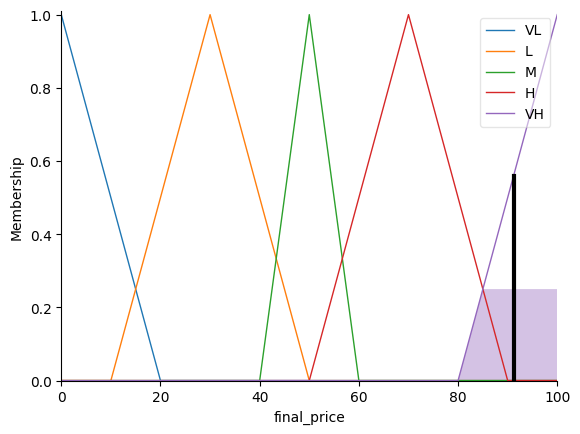

In [ ]:
#vd2.11

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


market_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'market_demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')


final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

market_demand['L'] = fuzz.trimf(market_demand.universe, [0, 0, 4])
market_demand['M'] = fuzz.trimf(market_demand.universe, [3, 5, 7])
market_demand['H'] = fuzz.trimf(market_demand.universe, [6, 10, 10])

competitor_price['L'] = fuzz.trimf(competitor_price.universe, [0, 0, 4])
competitor_price['M'] = fuzz.trimf(competitor_price.universe, [3, 5, 7])
competitor_price['H'] = fuzz.trimf(competitor_price.universe, [6, 10, 10])

production_cost['L'] = fuzz.trimf(production_cost.universe, [0, 0, 4])
production_cost['M'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['H'] = fuzz.trimf(production_cost.universe, [6, 10, 10])

seasonality['OP'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['N'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['P'] = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock_level['L'] = fuzz.trimf(stock_level.universe, [0, 0, 4])
stock_level['M'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['H'] = fuzz.trimf(stock_level.universe, [6, 10, 10])


final_price['VL'] = fuzz.trimf(final_price.universe, [0, 0, 20])
final_price['L'] = fuzz.trimf(final_price.universe, [10, 30, 50])
final_price['M'] = fuzz.trimf(final_price.universe, [40, 50, 60])
final_price['H'] = fuzz.trimf(final_price.universe, [50, 70, 90])
final_price['VH'] = fuzz.trimf(final_price.universe, [80, 100, 100])


rule1 = ctrl.Rule(market_demand['H'] & competitor_price['H'] & stock_level['L'], final_price['VH'])
rule2 = ctrl.Rule(market_demand['H'] & seasonality['P'] & stock_level['L'], final_price['VH'])
rule3 = ctrl.Rule(market_demand['M'] & production_cost['H'] & stock_level['L'], final_price['VH'])

rule4 = ctrl.Rule(market_demand['H'] & competitor_price['M'] & stock_level['M'], final_price['H'])
rule5 = ctrl.Rule(market_demand['M'] & competitor_price['H'] & stock_level['L'], final_price['H'])
rule6 = ctrl.Rule(market_demand['M'] & seasonality['P'] & stock_level['M'], final_price['H'])

rule7 = ctrl.Rule(market_demand['M'] & competitor_price['M'] & stock_level['M'], final_price['M'])
rule8 = ctrl.Rule(market_demand['L'] & competitor_price['H'] & stock_level['M'], final_price['M'])
rule9 = ctrl.Rule(market_demand['M'] & production_cost['M'] & stock_level['M'], final_price['M'])

rule10 = ctrl.Rule(market_demand['L'] & competitor_price['L'] & stock_level['H'], final_price['L'])
rule11 = ctrl.Rule(market_demand['M'] & production_cost['M'] & stock_level['H'], final_price['L'])
rule12 = ctrl.Rule(market_demand['L'] & seasonality['OP'] & stock_level['H'], final_price['L'])

rule13 = ctrl.Rule(market_demand['L'] & competitor_price['L'] & stock_level['H'], final_price['VL'])
rule14 = ctrl.Rule(market_demand['L'] & seasonality['OP'] & stock_level['H'], final_price['VL'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['market_demand'] = 8
fuzzy_system.input['competitor_price'] = 7
fuzzy_system.input['production_cost'] = 4
fuzzy_system.input['seasonality'] = 9
fuzzy_system.input['stock_level'] = 3


fuzzy_system.compute()


print("Giá cuối cùng",fuzzy_system.output['final_price'])


final_price.view(sim=fuzzy_system)
